In [ ]:
! pip install -q torch torchvision matplotlib
! pip install -U ipywidgets
! pip install numpy==1.26.4
! pip install urllib3==1.26.6

In [23]:
import pickle
import matplotlib.pyplot as plt

In [24]:
def load_experiment_data(folder, strategy_name, experiment_name = ""):

    if experiment_name != "":
        training_result_file_name = f"{strategy_name}_{experiment_name}_results.p"
        model_result_file_name = f"{strategy_name}_model_{experiment_name}_results.p"
    else:
        training_result_file_name = f"{strategy_name}_results.p"
        model_result_file_name = f"{strategy_name}_model_results.p"


    with open(f'experiments/{folder}/results/{training_result_file_name}', 'rb') as f:
        training_results = pickle.load(f)
    
    with open(f'experiments/{folder}/results/{model_result_file_name}', 'rb') as f:
        model_results = pickle.load(f)
        
    return training_results, model_results

# Original Strategies vs FedPart Strategies

## Ideal Setup

In [38]:
# Load Data

# fed_avg_train_result, fed_avg_model_result = load_experiment_data("original_strategies", "fed_avg")
# fed_avg_rounds = list(fed_avg_train_result.keys())

# fed_prox_train_result, fed_prox_model_result = load_experiment_data("original_strategies", "fed_prox")
# fed_prox_rounds = list(fed_prox_train_result.keys())

# fed_moon_train_result, fed_moon_model_result = load_experiment_data("original_strategies", "fed_moon_no_freeze")
# fed_moon_rounds = list(fed_moon_train_result.keys())

fed_part_avg_train_result, fed_part_avg_model_result = load_experiment_data("fedpart_strategies", "fed_part_avg")
fed_part_avg_rounds = list(fed_part_avg_train_result.keys())

fed_part_prox_train_result, fed_part_prox_model_result = load_experiment_data("fedpart_strategies", "fed_part_prox")
fed_part_prox_rounds = list(fed_part_prox_train_result.keys())

# fed_part_moon_train_result, fed_part_moon_model_result = load_experiment_data("fedpart_strategies", "fed_moon_no_freeze")

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/original_strategies/results/fed_prox_results.p'

### Communication Cost

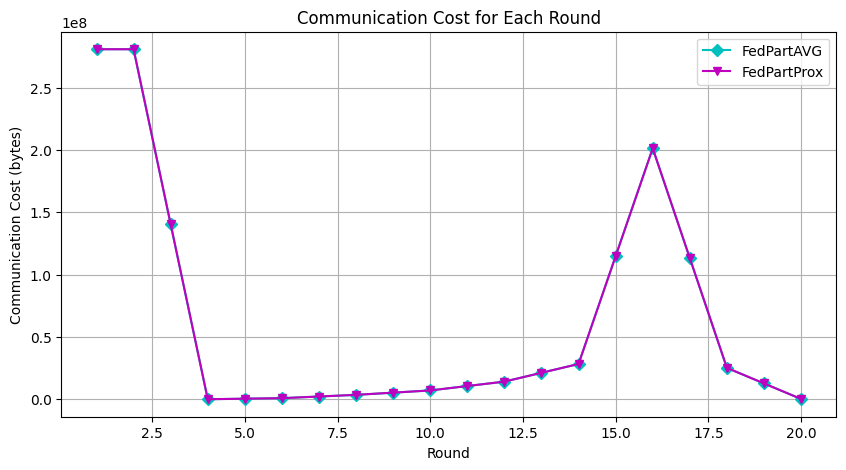

In [35]:
# fed_avg_sizes = [fed_avg_train_result[round]["total_size"] for round in fed_avg_rounds]
# fed_prox_sizes = [fed_prox_train_result[round]["total_size"] for round in fed_prox_rounds]
# fed_moon_sizes = [fed_moon_train_result[round]["total_size"] for round in fed_moon_rounds]
fed_part_avg_sizes = [fed_part_avg_train_result[round]["total_size"] for round in fed_part_avg_rounds]
fed_part_prox_sizes = [fed_part_prox_train_result[round]["total_size"] for round in fed_part_prox_rounds]




plt.figure(figsize=(10, 5))
# plt.plot(fed_avg_rounds, fed_avg_sizes, marker='o', linestyle='-', color='b', label='FedAvg')
# plt.plot(fed_prox_rounds, fed_prox_sizes, marker='s', linestyle='-', color='r', label='FedProx')
# plt.plot(fed_moon_rounds, fed_moon_sizes, marker='^', linestyle='-', color='g', label='FedMoon')
plt.plot(fed_part_avg_rounds, fed_part_avg_sizes, marker='D', linestyle='-', color='c', label='FedPartAVG')
plt.plot(fed_part_prox_rounds, fed_part_prox_sizes, marker='v', linestyle='-', color='m', label='FedPartProx')




plt.xlabel('Round')
plt.ylabel('Communication Cost (bytes)')
plt.title('Communication Cost for Each Round')
plt.legend()
plt.grid(True)

### Accuracy

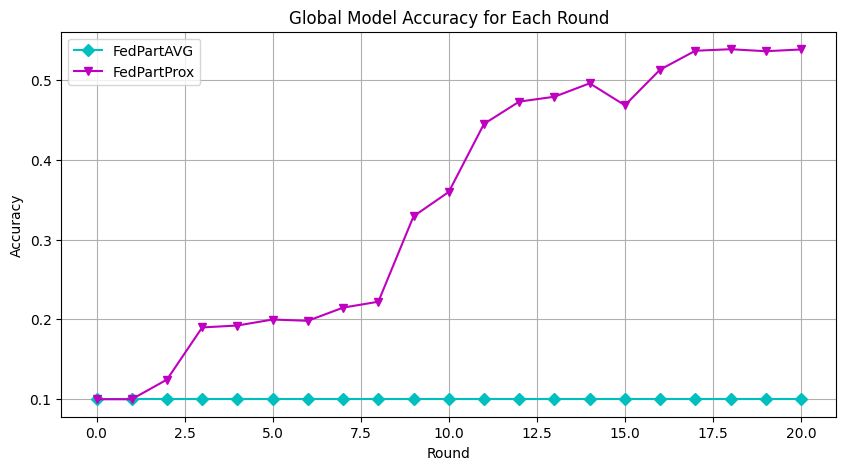

In [36]:

# fed_avg_model_rounds = list(fed_avg_model_result.keys())
# fed_avg_accuracies = [fed_avg_model_result[round]["global_metrics"]["accuracy"] for round in fed_avg_model_rounds]

# print(fed_part_avg_model_result)


# fed_prox_model_rounds = list(fed_prox_model_result.keys())
# fed_prox_accuracies = [fed_prox_model_result[round]["global_metrics"]["accuracy"] for round in fed_prox_model_rounds]

# fed_moon_model_rounds = list(fed_moon_model_result.keys())
# fed_moon_accuracies = [fed_moon_model_result[round]["global_metrics"]["accuracy"] for round in fed_moon_model_rounds]

fed_part_avg_model_rounds = list(fed_part_avg_model_result.keys())
fed_part_avg_accuracies = [fed_part_avg_model_result[round]["global_metrics"]["accuracy"] for round in fed_part_avg_model_rounds]

fed_part_prox_model_rounds = list(fed_part_prox_model_result.keys())
fed_part_prox_accuracies = [fed_part_prox_model_result[round]["global_metrics"]["accuracy"] for round in fed_part_prox_model_rounds]



plt.figure(figsize=(10, 5))
# plt.plot(fed_avg_model_rounds, fed_avg_accuracies, marker='o', linestyle='-', color='b', label='FedAvg')
# plt.plot(fed_prox_model_rounds, fed_prox_accuracies, marker='s', linestyle='-', color='r', label='FedProx')
# plt.plot(fed_moon_model_rounds, fed_moon_accuracies, marker='^', linestyle='-', color='g', label='FedMoon')
plt.plot(fed_part_avg_model_rounds, fed_part_avg_accuracies, marker='D', linestyle='-', color='c', label='FedPartAVG')
plt.plot(fed_part_prox_model_rounds, fed_part_prox_accuracies, marker='v', linestyle='-', color='m', label='FedPartProx')



plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Global Model Accuracy for Each Round')
plt.legend()
plt.grid(True)

### Client Loss

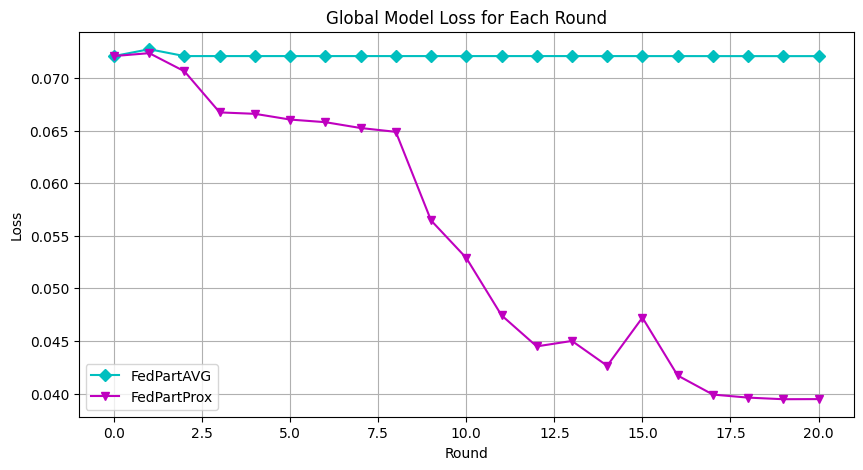

In [37]:
# fed_avg_global_losses = [fed_avg_model_result[round]["global_loss"] for round in fed_avg_model_rounds]
# fed_prox_global_losses = [fed_prox_model_result[round]["global_loss"] for round in fed_prox_model_rounds]
# fed_moon_global_losses = [fed_moon_model_result[round]["global_loss"] for round in fed_moon_model_rounds]
fed_part_avg_global_losses = [fed_part_avg_model_result[round]["global_loss"] for round in fed_part_avg_model_rounds]
fed_part_prox_global_losses = [fed_part_prox_model_result[round]["global_loss"] for round in fed_part_prox_model_rounds]

plt.figure(figsize=(10, 5))
# plt.plot(fed_avg_model_rounds, fed_avg_global_losses, marker='o', linestyle='-', color='b', label='FedAvg')
# plt.plot(fed_prox_model_rounds, fed_prox_global_losses, marker='s', linestyle='-', color='r', label='FedProx')
# plt.plot(fed_moon_model_rounds, fed_moon_global_losses, marker='^', linestyle='-', color='g', label='FedMoon')
plt.plot(fed_part_avg_model_rounds, fed_part_avg_global_losses, marker='D', linestyle='-', color='c', label='FedPartAVG')
plt.plot(fed_part_prox_model_rounds, fed_part_prox_global_losses, marker='v', linestyle='-', color='m', label='FedPartProx')


plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Global Model Loss for Each Round')
plt.legend()
plt.grid(True)

## Data Heterogenity

### Accuracy

### Client Loss

## Client Dropout

# FedMomentum vs FedPart vs Original Strategies

## FedAvg vs FedPartAVG vs FPAM

### Ideal Setup

#### Communication Cost

#### Accuracy

#### Client Loss